In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data aggregation and manipulation: 

### Loading gamer data

In [2]:
data = pd.read_csv('steamUsers.csv', sep=',')

### cleaning gamer data

In [3]:
#Removed the useless 0 column 
data = data.drop('0', 1)
nRawRows = data.shape[0]

In [4]:
#Removed duplicates
data.drop_duplicates(subset=None, keep="first", inplace=True)
print(nRawRows, "rows before removing duplicates")
nRows = data.shape[0]
print(nRows, "rows after removing duplicates")

200000 rows before removing duplicates
199293 rows after removing duplicates


### Purchased without playing

In [5]:
nonPlayedGames = pd.DataFrame(data)
nonPlayedGames.drop_duplicates(subset=['gamerId','gameName'], keep=False, inplace=True)
nNPlayed = nonPlayedGames.shape[0]
print(nNPlayed, "games were purchased but never played")
d = {1.0:0.5}
nonPlayedGames = nonPlayedGames.replace(d)
nonPlayedGames = nonPlayedGames.drop('Action', 1)
nonPlayedGames.head()

58327 games were purchased but never played


,gamerId,gameName,playHours
52,151603712,Alan Wake,0.5
53,151603712,BioShock 2,0.5
54,151603712,Fallen Earth,0.5
55,151603712,Fallout New Vegas Courier's Stash,0.5
56,151603712,Fallout New Vegas Dead Money,0.5


### Purchased and played

In [6]:
playCheck = data.Action.str.contains('play') 
playedGames = data[playCheck] 
nplayed = playedGames.shape[0]
print(nplayed, "games were purchased and played")
playedGames = playedGames.drop('Action', 1)
playedGames.head()

70489 games were purchased and played


,gamerId,gameName,playHours
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


### combining played and non played dataset

In [7]:
frames = [playedGames, nonPlayedGames]

ppgames = pd.concat(frames,ignore_index=True)
ppgames.sort_values(by=['gamerId', 'gameName'])
ppgames.head()


,gamerId,gameName,playHours
0,151603712,The Elder Scrolls V Skyrim,273.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9


In [8]:
ppgames.shape


(128816, 3)

### Load games data

In [9]:
gamesData = pd.read_csv('steamGames.csv', sep=',')
gamesData.rename(columns={'name': 'gameName'}, inplace=True)
gamesData.head(6)

,appid,gameName,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99


### Merging gamer data with games data

In [10]:
catgames = ppgames.merge(gamesData[['gameName','appid','categories']], how='left', on='gameName')
catgames.dropna(inplace=True)
catgames.head()


,gamerId,gameName,playHours,appid,categories
1,151603712,Fallout 4,87.0,377160.0,Single-player;Steam Achievements;Full controll...
4,151603712,Left 4 Dead 2,8.9,550.0,Single-player;Multi-player;Co-op;Steam Achieve...
5,151603712,HuniePop,8.5,339800.0,Single-player;Steam Achievements;Steam Trading...
6,151603712,Path of Exile,8.1,238960.0,Single-player;Multi-player;Online Multi-Player...
7,151603712,Poly Bridge,7.5,367450.0,Single-player;Steam Achievements;Steam Trading...


In [11]:
catgames.appid = catgames.appid.apply(int)
catgames

,gamerId,gameName,playHours,appid,categories
1,151603712,Fallout 4,87.0,377160,Single-player;Steam Achievements;Full controll...
4,151603712,Left 4 Dead 2,8.9,550,Single-player;Multi-player;Co-op;Steam Achieve...
5,151603712,HuniePop,8.5,339800,Single-player;Steam Achievements;Steam Trading...
6,151603712,Path of Exile,8.1,238960,Single-player;Multi-player;Online Multi-Player...
7,151603712,Poly Bridge,7.5,367450,Single-player;Steam Achievements;Steam Trading...
...,...,...,...,...,...
128848,88705345,Neverwinter,0.5,109600,Multi-player;MMO;Co-op;Steam Trading Cards;In-...
128849,88705345,RIFT,0.5,39120,Multi-player;Online Multi-Player;MMO;Co-op;Onl...
128850,188089669,Unturned,0.5,304930,Single-player;Online Multi-Player;Online Co-op...
128851,68081395,iBomber Defense Pacific,0.5,206690,Single-player


### Converting categories in one hot format

In [12]:
#catonehot = catgames.drop(columns=['appid','gameName','playHours'])
catonehot = catgames
def splitCat(x):
    if x['categories'] is np.nan:
        return x
    else:
        genres = list(map(lambda y: y.strip(), x['categories'].split(';')))
        for g in genres:
            x[g] = 1
        return x

catonehot = catonehot.apply(splitCat, axis=1)
catonehot


,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled,appid,categories,gameName,gamerId,playHours
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,377160,Single-player;Steam Achievements;Full controll...,Fallout 4,151603712,87.0
4,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,550,Single-player;Multi-player;Co-op;Steam Achieve...,Left 4 Dead 2,151603712,8.9
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,339800,Single-player;Steam Achievements;Steam Trading...,HuniePop,151603712,8.5
6,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,238960,Single-player;Multi-player;Online Multi-Player...,Path of Exile,151603712,8.1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,367450,Single-player;Steam Achievements;Steam Trading...,Poly Bridge,151603712,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128848,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,109600,Multi-player;MMO;Co-op;Steam Trading Cards;In-...,Neverwinter,88705345,0.5
128849,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39120,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,RIFT,88705345,0.5
128850,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,304930,Single-player;Online Multi-Player;Online Co-op...,Unturned,188089669,0.5
128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206690,Single-player,iBomber Defense Pacific,68081395,0.5


In [13]:
catonehot

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled,appid,categories,gameName,gamerId,playHours
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,377160,Single-player;Steam Achievements;Full controll...,Fallout 4,151603712,87.0
4,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,550,Single-player;Multi-player;Co-op;Steam Achieve...,Left 4 Dead 2,151603712,8.9
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,339800,Single-player;Steam Achievements;Steam Trading...,HuniePop,151603712,8.5
6,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,238960,Single-player;Multi-player;Online Multi-Player...,Path of Exile,151603712,8.1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,367450,Single-player;Steam Achievements;Steam Trading...,Poly Bridge,151603712,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128848,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,109600,Multi-player;MMO;Co-op;Steam Trading Cards;In-...,Neverwinter,88705345,0.5
128849,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39120,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,RIFT,88705345,0.5
128850,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,304930,Single-player;Online Multi-Player;Online Co-op...,Unturned,188089669,0.5
128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206690,Single-player,iBomber Defense Pacific,68081395,0.5


In [14]:
ncats = catonehot.shape[1]-5
print("We found", ncats, "categories")

We found 27 categories


### Calculating categories weights for each gamer

In [15]:
finalgameset = catonehot 
finalgameset = finalgameset.drop(['gameName','appid', 'categories'], axis=1)

attr = finalgameset.columns.tolist()
attr.remove('playHours')
attr.remove('gamerId')
finalgameset[attr] = finalgameset[attr].mul(finalgameset['playHours'], axis=0)

finalgameset = (finalgameset
         .groupby(by='gamerId')
         .mean())

finalgameset = finalgameset.drop(['playHours'], axis=1)
finalgameset



,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled
gamerId,,,,,,,,,,,,,,,,,,,,,
5250,4.060,6.233333,4.966667,0.8,13.600000,0.5,0.5,4.950000,NaN,0.500000,...,6.433333,4.060000,4.875,NaN,3.775,NaN,4.866667,0.2,NaN,0.500000
76767,4.525,4.175000,15.000000,NaN,5.766667,NaN,NaN,5.433333,NaN,122.000000,...,7.900000,8.420000,3.860,0.5,7.750,NaN,15.000000,NaN,NaN,61.366667
86540,3.620,5.714286,5.700000,3.6,3.133333,NaN,5.7,0.425000,0.5,0.500000,...,8.450000,2.083333,3.200,NaN,3.200,NaN,6.833333,NaN,NaN,2.771429
103360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,...,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,...,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309404240,2.200,NaN,2.200000,2.2,NaN,7.6,NaN,5.166667,NaN,NaN,...,7.600000,4.050000,6.850,NaN,4.050,NaN,7.600000,NaN,13.0,7.600000
309434439,NaN,0.800000,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.800,NaN,0.800000,0.8,NaN,0.800000
309812026,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,0.500000,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN


In [16]:
finalgameset = finalgameset.fillna(value=0)
finalgameset.head()

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled
gamerId,,,,,,,,,,,,,,,,,,,,,
5250,4.060,6.233333,4.966667,0.8,13.600000,0.5,0.5,4.950000,0.0,0.500000,...,6.433333,4.060000,4.875,0.0,3.775,0.0,4.866667,0.2,0.0,0.500000
76767,4.525,4.175000,15.000000,0.0,5.766667,0.0,0.0,5.433333,0.0,122.000000,...,7.900000,8.420000,3.860,0.5,7.750,0.0,15.000000,0.0,0.0,61.366667
86540,3.620,5.714286,5.700000,3.6,3.133333,0.0,5.7,0.425000,0.5,0.500000,...,8.450000,2.083333,3.200,0.0,3.200,0.0,6.833333,0.0,0.0,2.771429
103360,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.500000,...,0.000000,0.000000,0.500,0.0,0.000,0.0,0.000000,0.0,0.0,0.500000
144736,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.366667,...,0.000000,0.000000,0.500,0.0,0.000,0.0,0.000000,0.0,0.0,0.433333


In [17]:
#if a categorie is empty we remove it
nullTags = []
for c in finalgameset.columns:
    if (finalgameset[c] == 0).all():
        nullTags.append(c)

if nullTags != []:
    finalgameset = finalgameset.drop(columns=nullTags)

newNcat = finalgameset.shape[1]

if ncats > newNcat:
    print(ncats - newNcat, "categories were removed")
else:
    print("no categorie has been removed")


no categorie has been removed


### normalization

In [18]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
SC.fit(finalgameset)
xnorm=SC.transform(finalgameset)

### PCA

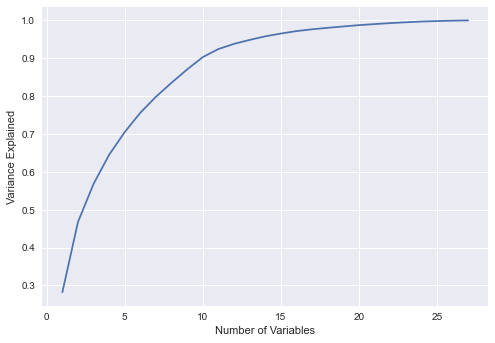

In [19]:
pca = PCA()
pca.fit(xnorm)

acc_var = np.cumsum(pca.explained_variance_ratio_) 

plt.style.use('seaborn')
plt.plot(range(1, len(acc_var)+1), acc_var)
plt.xlabel('Number of Variables')
_ = plt.ylabel('Variance Explained')

In [20]:
#between 5 and 10 we pick 8
number_of_components = 8
pca.set_params(n_components=number_of_components)
pca.fit(xnorm)
gamers_pca = pca.transform(xnorm)
gamers_pos_pca = pd.DataFrame(gamers_pca)
gamers_pos_pca['gamerId'] = finalgameset.index
gamers_pos_pca = gamers_pos_pca.set_index('gamerId')
gamers_pos_pca.head()

,0,1,2,3,4,5,6,7
gamerId,,,,,,,,
5250,-0.655064,0.247839,-0.188790,-0.115828,-0.004796,0.190023,0.064894,-0.052058
76767,-0.465583,0.163823,0.245079,0.578121,-0.962029,0.215154,0.066421,-0.078759
86540,-0.667342,0.227391,-0.240096,-0.051729,0.005835,0.191548,0.057968,-0.038767
103360,-0.777576,0.159853,-0.309596,0.057580,0.023309,0.082154,0.090074,-0.038434
144736,-0.777766,0.159981,-0.310129,0.056895,0.024387,0.082038,0.090087,-0.038416


### quadratic error

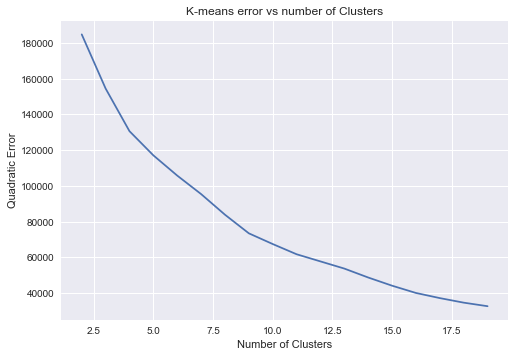

In [21]:
inertia = []
scores = []
for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1)
    kmeans.fit(gamers_pos_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 20), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Quadratic Error')
_ = plt.title('K-means error vs number of Clusters')

## Kmeans prediction and 3D plot

In [22]:
#project the users feature vector in 3 dimensions
gamers_with_label = pd.DataFrame(PCA(n_components=3).fit_transform(finalgameset))
gamers_with_label['gamerId'] = finalgameset.index
gamers_with_label = gamers_with_label.set_index('gamerId')

#find each user's cluster
kmeans = KMeans(n_clusters=8, n_jobs=-1)
gamers_with_label['label'] = kmeans.fit_predict(gamers_pos_pca)
gamers_with_label.head()

,0,1,2,label
gamerId,,,,
5250,-202.430007,-11.947512,-2.918424,0
76767,-160.158221,12.034751,-55.491938,0
86540,-200.582990,-10.595422,-3.578745,0
103360,-208.802511,-20.404636,-4.095389,0
144736,-208.851395,-20.426645,-4.027826,0


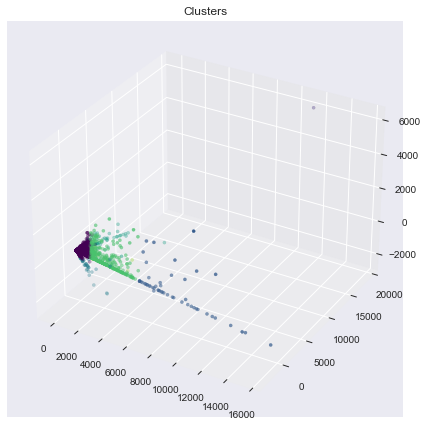

In [23]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(gamers_with_label[0], gamers_with_label[1], gamers_with_label[2], c=gamers_with_label['label'].to_numpy(), cmap='viridis', s=10)
_ = plt.title('Clusters')

In [24]:
clustersMembers = {}
for idx, val in (pd.get_dummies(gamers_with_label['label'])).sum().iteritems():
    clustersMembers[idx] = val

for p in clustersMembers:
    print("Cluster", p,"has",clustersMembers[p],"gamers")

Cluster 0 has 9575 gamers
Cluster 1 has 1 gamers
Cluster 2 has 52 gamers
Cluster 3 has 37 gamers
Cluster 4 has 65 gamers
Cluster 5 has 369 gamers
Cluster 6 has 9 gamers
Cluster 7 has 13 gamers


## Recommandation (testing extracted knowledge)

In [25]:
games2 = gamesData[['appid', 'average_playtime', 'owners']]


games2

,appid,average_playtime,owners
0,10,17612,10000000-20000000
1,20,277,5000000-10000000
2,30,187,5000000-10000000
3,40,258,5000000-10000000
4,50,624,5000000-10000000
...,...,...,...
27070,1065230,0,0-20000
27071,1065570,0,0-20000
27072,1065650,0,0-20000
27073,1066700,0,0-20000
